# Feature Importance

Feature importance is a concept commonly used in machine learning to determine the significance or contribution of individual features (variables or attributes) in a predictive model. 

It helps you understand which features have the most influence on the model's predictions or outcomes. Feature importance is particularly valuable for interpretation and understanding the factors that drive a model's decision-making process.

# Reading Pixel Image data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/rajatchauhan/Desktop/Machine Learning Notes/Datasets/Handwritten Image Classifier/train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This is a image pixel data with each image of 28x28 pixel, hence each datapoint have 784 features and the first column tell the image of this picture

In [10]:
X = df.iloc[:,1:].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
y = df.iloc[:,0].values
y

array([1, 0, 1, ..., 7, 6, 9])

Let us plot the fourth image how does it look for interpretation

In [14]:
import matplotlib.pyplot as plt

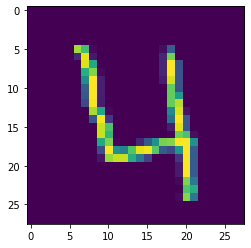

In [15]:
plt.imshow(X[3].reshape(28,28))

So, clearly the middle part of the image is of more importance, those features are more important

# Training Random Forest Classifier on overall data

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

We can simply get the feature importance number by calling the function feature_importances_

In [20]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.02132055e-06, 0.00000000e+00, 1.73511163e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.19268990e-07,
       1.96231674e-06, 2.40019982e-06, 5.98552392e-06, 1.56902175e-06,
       3.38689162e-06, 2.05461203e-06, 2.89409214e-06, 2.93643341e-06,
       7.40977189e-07, 3.07863350e-06, 2.23181688e-06, 8.91029806e-07,
       1.25267967e-06, 0.00000000e+00, 1.51842318e-06, 1.22053439e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

This is a list telling the feature importance of all the columns

In [22]:
rf.feature_importances_.shape

(784,)

Let us  visualize the feature importance numbers using a heat map by reshaping column to 28 by 28

In [23]:
import seaborn as sns

<AxesSubplot:>

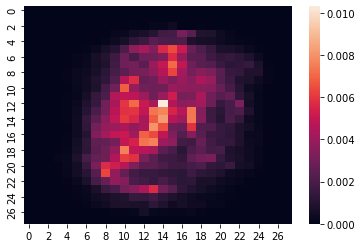

In [24]:
sns.heatmap(rf.feature_importances_.reshape(28,28))

So, clearly we can say the middle features are more important than the outer ones and our model is easily able to identify it

We can sort the features by their importance

In [27]:
for importance, name in sorted(zip(rf.feature_importances_, df.columns),reverse=True):
  print (name, importance)

pixel349 0.010308594961552236
pixel405 0.008187889133099866
pixel432 0.008017855197008471
pixel377 0.007717418908416775
pixel488 0.0075971399317280594
pixel513 0.007590869647220734
pixel408 0.0074033930302066005
pixel380 0.00735259856115013
pixel376 0.007288819726953565
pixel487 0.007261770625894036
pixel346 0.007061899078671767
pixel210 0.0070498226894233984
pixel459 0.006860311550840232
pixel289 0.006837372426355706
pixel404 0.006763897026928466
pixel433 0.006504731509051036
pixel154 0.006434330126066605
pixel460 0.006370202751038866
pixel238 0.006310599356995432
pixel595 0.006282172105795723
pixel541 0.0061293502941389254
pixel401 0.0060534752876544575
pixel374 0.005957327274061812
pixel345 0.005950282698019033
pixel373 0.005867914941372544
pixel436 0.005857784918163509
pixel542 0.005855474949795524
pixel262 0.0057422430494378255
pixel567 0.005692600122968953
pixel182 0.005666785244086854
pixel656 0.005648654564722442
pixel153 0.005607436619677598
pixel402 0.005606241492594831
pixel

# But how its being calculated ?? Knowing the simple maths behind

Tree-Based Models (Decision Trees, Random Forest, Gradient Boosting):

- Gini Importance (Decision Trees): In decision trees, the Gini importance measures the total reduction in impurity (usually Gini impurity) brought by a feature. Features with higher Gini importance are considered more important.

- Feature Importance (Random Forest): Random Forest calculates the feature importance by averaging the Gini importance or information gain of each feature over all the trees in the ensemble.

- Feature Importance (Gradient Boosting): Gradient boosting algorithms (e.g., XGBoost, LightGBM) compute feature importance by measuring the number of times a feature is selected for splitting across all the trees in the boosting process.

# 1. In a single decision tree

In [28]:
from sklearn.datasets import make_classification

In [29]:
X, y = make_classification(n_samples=5, n_features = 2, n_classes= 2, 
                           n_informative= 2, n_redundant=0, random_state=0)

In [30]:
X

array([[ 0.96399434, -0.12399406],
       [ 1.05699092,  0.69448021],
       [-0.55744457,  0.08369352],
       [-1.19224399, -1.66447018],
       [-0.3874711 ,  1.38366234]])

In [31]:
y

array([0, 1, 0, 1, 0])

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtclf = DecisionTreeClassifier()

dtclf.fit(X,y)

DecisionTreeClassifier()

In [34]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'X[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'X[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

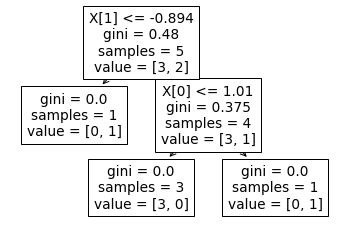

In [35]:
plot_tree(dtclf)

In [36]:
dtclf.feature_importances_

array([0.625, 0.375])

So the first feature is more important

We calculate it by calculating the ratio of the sum of Gini Impurity Reductions across all nodes where that feature is used for splitting divided by the sum of Gini Impurity Reductions across all the nodes.
    
Gini Impurity Reduction at any node = Gini impurity (before splitting) - Σ[Weighted Gini impurity (after splitting)]

Thus that feature is the most important which reduces the gini impurity the most in the tree.

Or which have the most Gini Importance.

# 2. In Random Forest with two estimators

In [37]:
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X,y)

RandomForestClassifier(n_estimators=2)

Let us see the feature importances given by the Random Forest Ensemble

In [44]:
rf.feature_importances_

array([0.72222222, 0.27777778])

Let us see the feature importances given by the two estimator trees used by this Random Forest Ensemble

In [45]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=780428486),
 DecisionTreeClassifier(max_features='auto', random_state=1109996596)]

In [43]:
print(rf.estimators_[0].feature_importances_)
print(rf.estimators_[1].feature_importances_)

[0.44444444 0.55555556]
[1. 0.]


Thus the Random Forest Feature importances is simply the averages of the individual tree feature importances.